In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

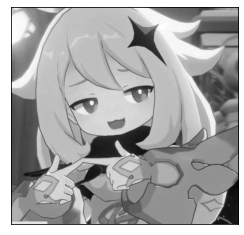

In [8]:
img = cv2.imread('data/paimeng.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

height = img.shape[0]
width = img.shape[1]

plt.figure()
plt.imshow(gray, "gray")
plt.xticks([]), plt.yticks([])
plt.show()

## 大津法

In [21]:
def OTSU(gray):
    # find normalized_histogram, and its cumulative distribution function
    hist = cv2.calcHist([gray],[0],None,[256],[0,256])
    hist_norm = hist.ravel()/hist.max()
    Q = hist_norm.cumsum()
    bins = np.arange(256)
#     print(bins)
    fn_min = np.inf
    thresh = -1
    for i in range(1,256):
        p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
        q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
        b1,b2 = np.hsplit(bins,[i]) # weights
        # finding means and variances
        m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
        v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2

        # calculates the minimization function
        fn = v1*q1 + v2*q2
        if fn < fn_min:
            fn_min = fn
            thresh = i
    return thresh

<ipython-input-21-2223bee221da>:15: RuntimeWarning: invalid value encountered in double_scalars
  m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
<ipython-input-21-2223bee221da>:15: RuntimeWarning: divide by zero encountered in double_scalars
  m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
<ipython-input-21-2223bee221da>:16: RuntimeWarning: invalid value encountered in multiply
  v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2


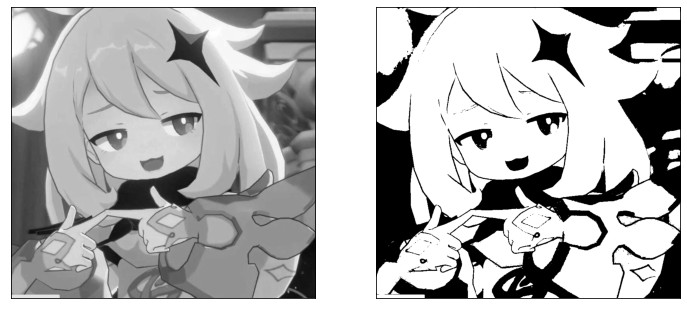

In [22]:
_, result = cv2.threshold(gray, OTSU(gray), 255, cv2.THRESH_BINARY)

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(gray, "gray")
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(result, "gray")
plt.xticks([]), plt.yticks([])
plt.show()

## 自适应阈值-迭代法

In [41]:
def Iteration(gray):
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
    hist_norm = hist.ravel()/hist.max()
    Q = hist_norm.cumsum()
    bins = np.arange(256)
    
    img_array = np.array(gray).astype(np.float32)
    zmax, zmin = np.max(img_array), np.min(img_array)
    t0 = int((zmax + zmin) / 2)
    b = 1
    
    cnt = 0
    while True:
        p1,p2 = np.hsplit(hist_norm,[t0]) # probabilities
        b1,b2 = np.hsplit(bins,[t0]) # weights
        w1 = Q[t0]
        w2 = Q[255]-Q[t0]
        u0 = np.sum(p1*b1)/w1
        u1 = np.sum(p2*b2)/w2
        
        t1 = int((u0 + u1) / 2)
        if math.fabs(t1-t0)<1:
            break
        else:
            t0 = t1
        cnt+=1
        if cnt>=10:
            break
            
    return t1

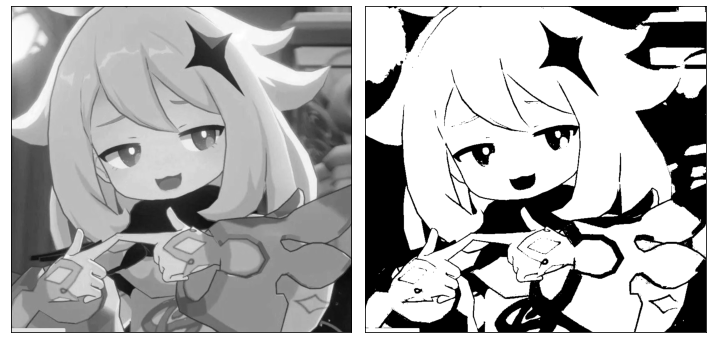

In [42]:
_, result = cv2.threshold(gray, Iteration(gray), 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 12))
plt.subplot(121), plt.imshow(gray, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(result, 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

参考代码：https://blog.csdn.net/huangzhe0701/article/details/120485879